### 1. importing libraries

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. importing data

In [104]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [105]:
#1. we have to remove some unwanted columns.
#2. we have to do a lot of feature engineering. let take screen resolution column it contains several info like 
#   display type (ips, hd, full hd), retina dispaly or not, resolution type i.e. so many info in a single column

In [106]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### 3. getting data ready

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [108]:
#1. ram is object type data bcoz it contains gb 
#2. similary weight is object type data bcoz it contains kg

#### 3.1 handling duplicates

In [109]:
df[df.duplicated()].shape                                      

#or df.duplicated().sum()

#1. make sure you will not invlove s.no. column like 'Unnamed: 0' while checking duplicate records
#2. there are chances that a single laptop might sold at different prices on different days. i guess that is okay bcoz generally
#   this happens in real life as well during offer time.

(29, 11)

In [110]:
df.drop_duplicates(inplace=True)

#### 3.2 finding missing values

In [111]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

#### 3.3 droping unwanted columns

In [113]:
# df.drop(columns=['Unnamed: 0'],axis=1,inplace = True)
# df.columns

#we already droped it.

#### 3.4 removing unwanted strings from desired columns

In [114]:
#i want to remove kg from weight column and gb from ram column

In [115]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


#### 3.5 converting object data type of columns into numerical/categorical data types

In [116]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


### 4. feature engineering

#### 4.1 feature engineering on df['ScreenResolution']

In [117]:
df['ScreenResolution'].value_counts()

#1. information here is mixed up and represented in a different manner.
#2. we have to find some common information :
#   a) here i can see that every row has some 1920*1080 type pattern.
#   b) laptop is touchscreen or not.
#   c) ips panel or not.

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

##### a) extracting touchscreen and ips information

In [118]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda  x : 1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda  x : 1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.100,17742.240,0,0
791,Vero,Notebook,14.0,1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.220,10810.512,0,0
286,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,1.950,58448.160,0,1
70,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,58021.920,1,0
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.500,53226.720,0,1


##### b) extracting screen resolution information i.e. 1920 x 1080

In [119]:
#now we will create two new columns such that one contain x_resolution and another contain y_resolution (x=1920 and y=1080)

new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new.sample(5)
#1. every resoltion i.e. 1920x1080 contains 'x', so we will split according to 'x'
#2. expand = True will create a DataFrame

,0,1
1255,1366,768
579,Full HD 1920,1080
462,Full HD 1920,1080
1130,1366,768
643,IPS Panel Full HD 1920,1080


In [120]:
df['x_res'] = new[0]
df['y_res'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
364,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,2.20,26586.720,0,0,1366,768
186,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,127712.160,1,0,4K Ultra HD / Touchscreen 3840,2160
1087,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,180GB SSD,Intel HD Graphics 520,Windows 7,1.70,63882.720,0,0,Full HD 1920,1080
180,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,55890.720,0,0,Full HD 1920,1080
1055,HP,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.31,37570.392,0,0,1366,768


In [121]:
#df['y_res'] is correct
#we will write regular exression for df['x_res']

df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)')

0       [2560]
1       [1440]
2       [1920]
3       [2880]
4       [2560]
         ...  
1269    [1366]
1270    [1920]
1271    [3200]
1272    [1366]
1273    [1366]
Name: x_res, Length: 1274, dtype: object

In [122]:
#now i have to move these values from list

df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1269    1366
1270    1920
1271    3200
1272    1366
1273    1366
Name: x_res, Length: 1274, dtype: object

In [123]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x : x[0])

In [124]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res
215,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon 530,Windows 10,1.40,49650.5664,0,1,1920,1080
476,Dell,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.2400,0,0,1920,1080
284,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,3.00,50669.2800,0,1,1920,1080
477,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,180GB SSD,Intel HD Graphics 620,Windows 10,1.70,72673.9200,0,0,1920,1080
1260,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,44382.7728,1,0,1920,1080


In [125]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
Touchscreen           int64
Ips                   int64
x_res                object
y_res                object
dtype: object

In [126]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

##### c) why i create x_res and y_res

In [127]:
df.corr()

,Inches,Ram,Weight,Price,Touchscreen,Ips,x_res,y_res
Inches,1.000000,0.241441,0.826634,0.066990,-0.361873,-0.109942,-0.067916,-0.092768
Ram,0.241441,1.000000,0.389658,0.740106,0.111378,0.201446,0.423669,0.414816
Weight,0.826634,0.389658,1.000000,0.212192,-0.293933,0.022250,-0.028416,-0.049928
Price,0.066990,0.740106,0.212192,1.000000,0.188631,0.250358,0.552074,0.548111
Touchscreen,-0.361873,0.111378,-0.293933,0.188631,1.000000,0.139550,0.343077,0.350326
Ips,-0.109942,0.201446,0.022250,0.250358,0.139550,1.000000,0.271637,0.279652
x_res,-0.067916,0.423669,-0.028416,0.552074,0.343077,0.271637,1.000000,0.994064
y_res,-0.092768,0.414816,-0.049928,0.548111,0.350326,0.279652,0.994064,1.000000


In [128]:
df.corr()['Price']                                            #corr w.r.t. Price

#1. here i can see corr with x_res and y_res is very high
#2. corr between price and inches is very less

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
Ips            0.250358
x_res          0.552074
y_res          0.548111
Name: Price, dtype: float64

#### 4.2 Creating new column df['ppi']

In [129]:
#1. note : x_res and y_res have multicollinearity (see corr. b/w these) and inches have less corr with price.
#       so, we are going to make a new column ppi (pixcel per inches)
#2. generally, if ppi is more then price is also more
#3. ppi = ( sqrt[ (x_res)^2 + (y_res)^2 ] ) / (inches)

In [130]:
df['ppi'] = ( ((df['x_res']**2) + (df['y_res']**2))**0.5 ) / df['Inches']

In [131]:
df['ppi'].dtypes                                              #good practice to check dtypes of new column

dtype('float64')

In [132]:
df.corr()['Price']

#1. price have good corr. with ppi

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
Touchscreen    0.188631
Ips            0.250358
x_res          0.552074
y_res          0.548111
ppi            0.469539
Name: Price, dtype: float64

In [133]:
#now i can remove column 'ScreenResolution'
df.drop(columns=['ScreenResolution'],inplace=True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'Ips', 'x_res', 'y_res', 'ppi'],
      dtype='object')

#### 4.3 feature engineering on df['Cpu']

In [134]:
df['Cpu'].value_counts()

#1. there are so many processors. most famous are i5,i7
#2. we will create some category of processors like :
#   intel core i5, intel core i7, intel core i3, intel pentium, intel celeron, AMD
#3. for creating category, i will extract first three words

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [135]:
df['Cpu'].apply(lambda x : x.split())                          #it will split every word

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1269               [Intel, Core, i7, 6500U, 2.5GHz]
1270               [Intel, Core, i7, 6500U, 2.5GHz]
1271               [Intel, Core, i7, 6500U, 2.5GHz]
1272    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1273               [Intel, Core, i7, 6500U, 2.5GHz]
Name: Cpu, Length: 1274, dtype: object

In [136]:
#now i have to move these values from list and i only want first three words

df['cpu_name'] = df['Cpu'].apply(lambda x :" ".join(x.split()[0:3]))                   
df['cpu_name'].dtypes
#1. " ".join(x.split()[0:3]) #empty space + join three words

dtype('O')

In [137]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,cpu_name
708,Lenovo,Notebook,14.0,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.80,63456.48,0,0,1920,1080,157.350512,Intel Core i5
584,Dell,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,15717.60,0,0,1366,768,135.094211,Intel Celeron Dual
869,Dell,Workstation,15.6,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731.84,0,0,1920,1080,141.211998,Intel Core i7
1150,Lenovo,Notebook,15.6,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.90,18061.92,0,0,1366,768,100.454670,Intel Core i3
494,Asus,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,24,256GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,67612.32,1,1,1920,1080,127.335675,Intel Core i7


In [138]:
df[df['Company']=='Apple'].sample(2)

#note : macOS also have intel processor. don't confuse that they have their own category of processor
#       but have new one as 'Intel Core M'

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,cpu_name
6,Apple,Ultrabook,15.4,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800,220.534624,Intel Core i7
1193,Apple,Ultrabook,12.0,Intel Core M 1.1GHz,8,256GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.92,61964.6400,0,1,2304,1440,226.415547,Intel Core M


In [139]:
#fn for extracting more precise categories of preocessor

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' or text == 'Intel Core M':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [140]:
df['cpu_brand'] = df['cpu_name'].apply(fetch_processor)
df['cpu_brand'].value_counts()

Intel Core i7            515
Intel Core i5            423
Intel Core i3            134
Other Intel Processor    124
AMD Processor             61
Intel Core M              17
Name: cpu_brand, dtype: int64

In [141]:
#now i can drop columns Cpu,cpu_name
df.drop(columns=['Cpu','cpu_name'],inplace=True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'Touchscreen', 'Ips', 'x_res', 'y_res', 'ppi',
       'cpu_brand'],
      dtype='object')

#### 4.4 feature engineering on df['Memory']

In [142]:
df['Memory'].value_counts()

#1. i will create 4 columns from this column
#2. columns : hdd, ssd, flash storage, hybrid

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [143]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [144]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage
430,Samsung,Netbook,11.6,4,16 Flash Storage,Intel HD Graphics 400,Chrome OS,1.15,14332.32,0,0,1366,768,135.094211,Other Intel Processor,0,0,0,16
1250,Dell,Notebook,15.6,4,500 HDD,Intel HD Graphics,Linux,2.20,17262.72,0,0,1366,768,100.454670,Other Intel Processor,500,0,0,0
1069,Apple,Ultrabook,12.0,8,256 Flash Storage,Intel HD Graphics 515,Mac OS X,0.92,69264.00,0,1,2304,1440,226.415547,Intel Core M,0,0,0,256
640,Lenovo,Gaming,15.6,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050M,Windows 10,2.50,59087.52,0,1,1920,1080,141.211998,Intel Core i7,1000,128,0,0
1098,HP,Notebook,15.6,4,1000 HDD,Intel HD Graphics 405,Windows 10,1.96,26640.00,0,0,1366,768,100.454670,Other Intel Processor,1000,0,0,0


In [145]:
#now i can drop Memory column
df.drop(columns=['Memory'],inplace = True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'Price', 'Touchscreen', 'Ips', 'x_res', 'y_res', 'ppi', 'cpu_brand',
       'HDD', 'SSD', 'Hybrid', 'Flash_Storage'],
      dtype='object')

#### 4.5 feature engineering on df['Gpu']

In [146]:
df['Gpu'].value_counts()

#1. so many information in a single column
#2. i am just extracting brand name of graphics cards

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [147]:
df['Gpu'].apply(lambda x : x.split()[0])

0        Intel
1        Intel
2        Intel
3          AMD
4        Intel
         ...  
1269    Nvidia
1270     Intel
1271     Intel
1272     Intel
1273       AMD
Name: Gpu, Length: 1274, dtype: object

In [148]:
df['gpu_brand'] = df['Gpu'].apply(lambda x : x.split()[0])
df.head(2)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,gpu_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940,Intel Core i5,0,0,0,128,Intel


In [149]:
df['gpu_brand'].value_counts()

#1. only 1 row has ARM brand and i can think of removing it.

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: gpu_brand, dtype: int64

In [150]:
df = df[df['gpu_brand'] != 'ARM']

In [151]:
#droping Gpu column
df.drop(columns=['Gpu'],inplace = True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'x_res', 'y_res', 'ppi', 'cpu_brand', 'HDD',
       'SSD', 'Hybrid', 'Flash_Storage', 'gpu_brand'],
      dtype='object')

#### 4.6 feature engineering on df['OpSys']

In [152]:
df['OpSys'].value_counts()

#1. i just want to make make categories lesser

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [153]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [154]:
df['os'] = df['OpSys'].apply(cat_os)
df.sample(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,cpu_brand,HDD,SSD,Hybrid,Flash_Storage,gpu_brand,os
496,Lenovo,Notebook,15.6,8,Windows 10,2.17,47893.392,0,0,1920,1080,141.211998,Intel Core i7,0,256,0,0,Intel,Windows
706,Acer,2 in 1 Convertible,13.3,8,Windows 10,1.60,53226.720,1,1,1920,1080,165.632118,Intel Core i5,0,256,0,0,Intel,Windows
831,Lenovo,Ultrabook,14.0,16,Windows 10,1.10,111834.720,0,1,2560,1440,209.800683,Intel Core i7,0,512,0,0,Intel,Windows


In [155]:
df.drop(columns=['OpSys'],inplace=True)
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'x_res', 'y_res', 'ppi', 'cpu_brand', 'HDD',
       'SSD', 'Hybrid', 'Flash_Storage', 'gpu_brand', 'os'],
      dtype='object')

In [156]:
#### 4.7 

### 4. performing EDA

#### 4.1 df['Price'] column analysis

<Axes: xlabel='Price', ylabel='Density'>

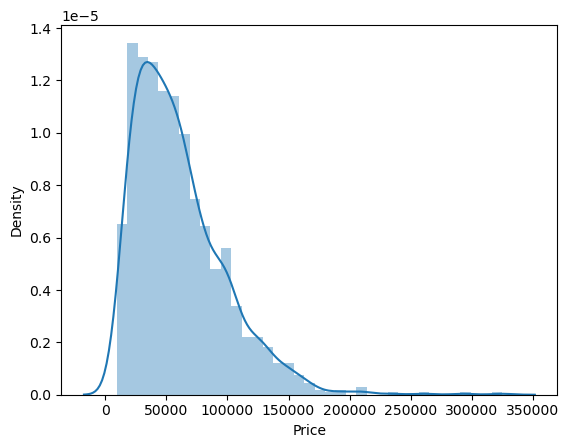

In [157]:
sns.distplot(df['Price'])

#1. we can say price is left skewed.
#2. there are so many laptops with less price.
#3. there are few laptops with high price.
#4. so, it indicates that cheap laptop's buyers are large in no. and expensive laptop's buyers are less in no.
#5. we have to focus on our skewed data while building algorithms.

#### 4.2 df['Company'] column analysis

In [158]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

<Axes: >

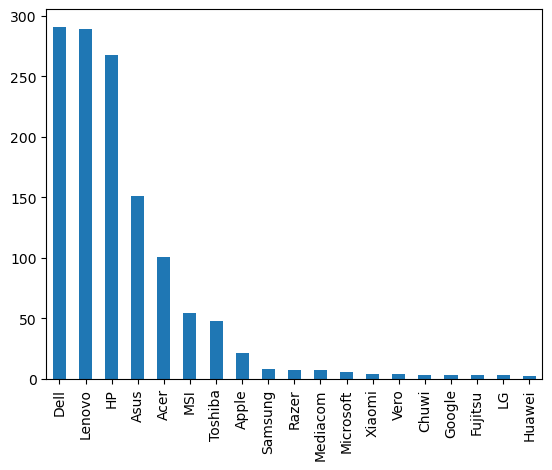

In [159]:
df['Company'].value_counts().plot(kind='bar')

#1. kuch brands k laptops bhaut saare h and kuch brands k laptops bhaut kam h
#2. upto apple, data for laptops is considerable.
#3. after apple, there are so many brands which have very few laptops and it indicate that these brands are less famous and 
#   we can think of removing these brands.

#### 4.3 now we will check avg price of brands and it will give us idea that brands name affect price or not ? ans : yes

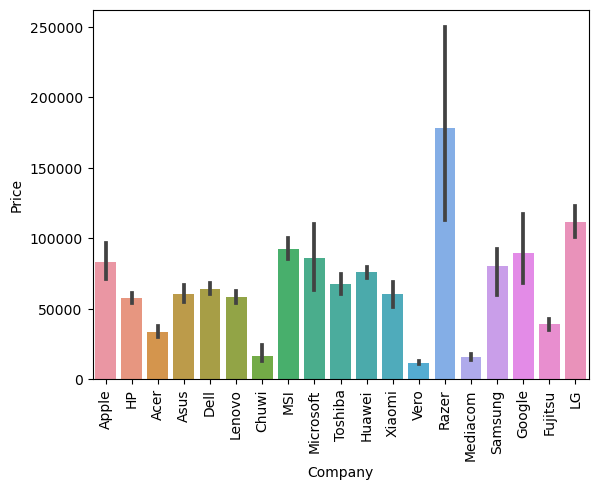

In [160]:
plt.xticks(rotation = 90)

sns.barplot(x=df['Company'],
            y=df['Price']
           )

plt.show()

#1. with brand name, prices vary
#2. laptop price depend on brand 

#### 4.4 df['TypeName'] column analysis

<Axes: >

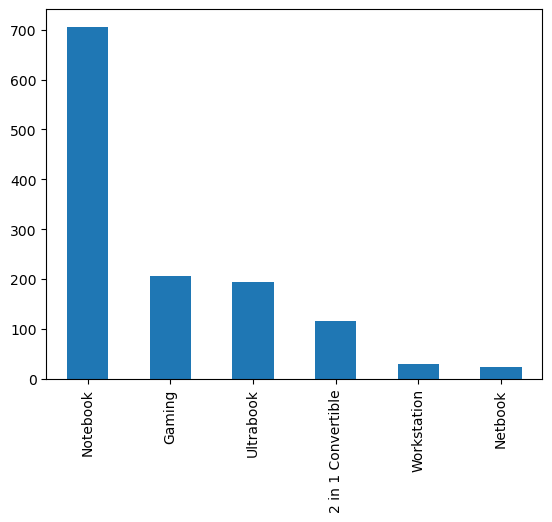

In [161]:
df['TypeName'].value_counts().plot(kind='bar')

#1. notebook is highest selling laptop bcoz it is budget friendly and mostly student buy it.

#### 4.5 let's check avg. price of each type of laptops

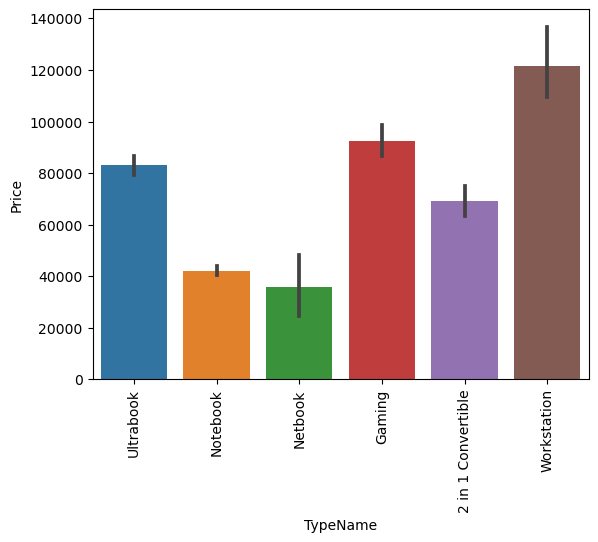

In [162]:
plt.xticks(rotation = 90)

sns.barplot(x=df['TypeName'],
            y=df['Price']
           )

plt.show()

#1. notebook and netbook are budget friendly
#2. workstations are very high in price and are very less vaailable or bought through online sites

#### 4.6 df['Inches'] column analysis

<Axes: xlabel='Inches', ylabel='Density'>

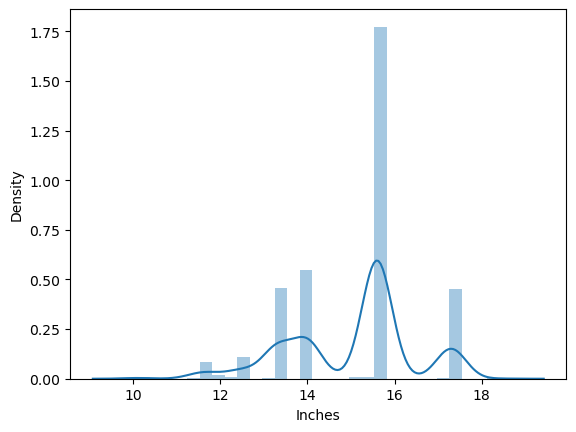

In [163]:
sns.distplot(df['Inches'])

#1. moslty laptops are of size 15.6, 13, 14, 17 

<Axes: xlabel='Inches', ylabel='Price'>

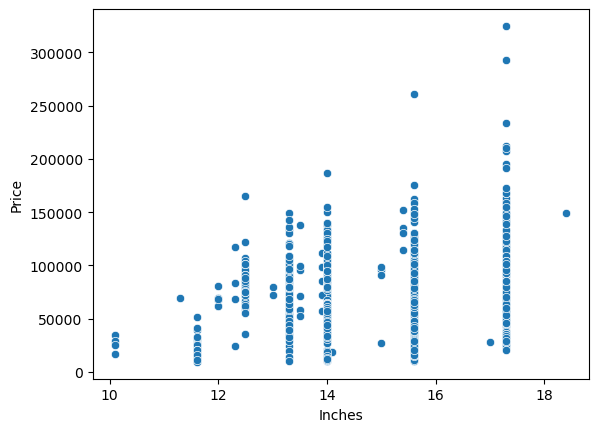

In [164]:
sns.scatterplot(x=df['Inches'],
                y=df['Price']
               )

#1. with increase in size, laptop price increases but relationship b/t inches and price is not so strong

#### 4.7 df['Touchscreen'] column analysis

<Axes: >

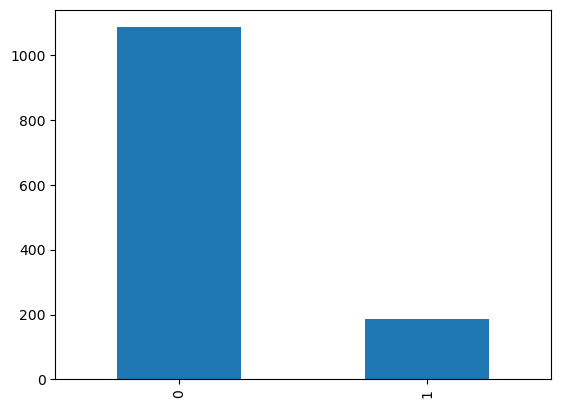

In [165]:
df['Touchscreen'].value_counts().plot(kind='bar')

#1. Touchscreen laptops are very less 

<Axes: xlabel='Touchscreen', ylabel='Price'>

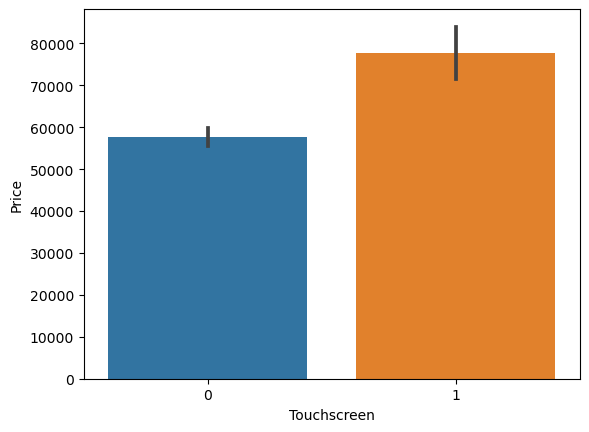

In [166]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

#1. touchscreen laptop's price is very high

#### 4.8 df['Ips'] column analysis

<Axes: >

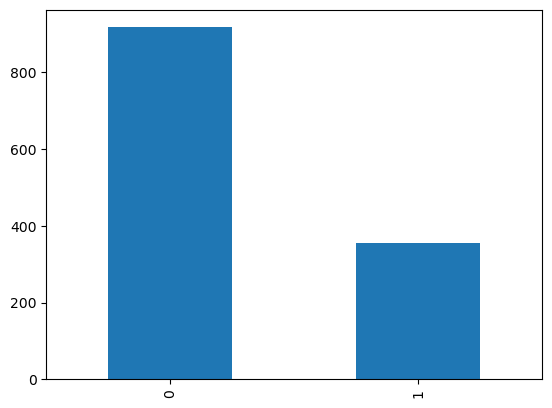

In [167]:
df['Ips'].value_counts().plot(kind='bar')

#1. ips display laptops are less than non ips display laptop

<Axes: xlabel='Ips', ylabel='Price'>

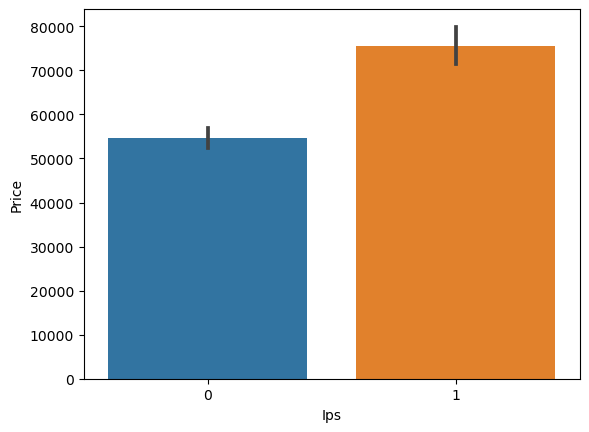

In [168]:
sns.barplot(x=df['Ips'],y=df['Price'])

#1. price for ips display laptops is high

#### 4.9 correlation analysis for resolution related columns

In [169]:
df.corr()

#1. there is high corr. between x_res and y_res

,Inches,Ram,Weight,Price,Touchscreen,Ips,x_res,y_res,ppi,HDD,SSD,Hybrid,Flash_Storage
Inches,1.000000,0.240551,0.826395,0.066079,-0.359605,-0.107806,-0.066522,-0.090246,-0.412608,0.528250,-0.104393,0.052184,-0.226009
Ram,0.240551,1.000000,0.389134,0.739996,0.113316,0.202809,0.424661,0.416773,0.294927,0.097340,0.599552,0.050275,-0.055956
Weight,0.826395,0.389134,1.000000,0.211667,-0.292288,0.023966,-0.027387,-0.048089,-0.319499,0.510876,-0.056984,0.105145,-0.176381
Price,0.066079,0.739996,0.211667,1.000000,0.190382,0.251514,0.552939,0.549944,0.471481,-0.098481,0.669808,0.022490,-0.036712
Touchscreen,-0.359605,0.113316,-0.292288,0.190382,1.000000,0.136973,0.342079,0.348087,0.452107,-0.205105,0.252142,-0.036483,-0.019146
Ips,-0.107806,0.202809,0.023966,0.251514,0.136973,1.000000,0.270744,0.277974,0.288833,-0.090411,0.215197,-0.013576,0.072706
x_res,-0.066522,0.424661,-0.027387,0.552939,0.342079,0.270744,1.000000,0.994331,0.930369,-0.119810,0.520235,-0.001724,-0.013878
y_res,-0.090246,0.416773,-0.048089,0.549944,0.348087,0.277974,0.994331,1.000000,0.938383,-0.131415,0.512442,-0.003226,0.018819
ppi,-0.412608,0.294927,-0.319499,0.471481,0.452107,0.288833,0.930369,0.938383,1.000000,-0.290774,0.499899,-0.020944,0.079691
HDD,0.528250,0.097340,0.510876,-0.098481,-0.205105,-0.090411,-0.119810,-0.131415,-0.290774,1.000000,-0.400625,-0.070240,-0.114385


In [170]:
df.corr()['Price']                                          #corr. w.r.t. Price

#1. less corr b/w price and inches
#2. high corr b/w price and x_res/y_res
#3. ppi has good corr. with price
#4. note : i can think of removing inches,x_res,y_res as all the info related to these three is contained in ppi
#          also x_res and y_res have high corr. and inches has less corr. with price

Inches           0.066079
Ram              0.739996
Weight           0.211667
Price            1.000000
Touchscreen      0.190382
Ips              0.251514
x_res            0.552939
y_res            0.549944
ppi              0.471481
HDD             -0.098481
SSD              0.669808
Hybrid           0.022490
Flash_Storage   -0.036712
Name: Price, dtype: float64

In [171]:
df.drop(columns=['Inches','x_res','y_res'],inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'cpu_brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'gpu_brand', 'os'],
      dtype='object')

#### 4.10 df['brand_name'] column analysis

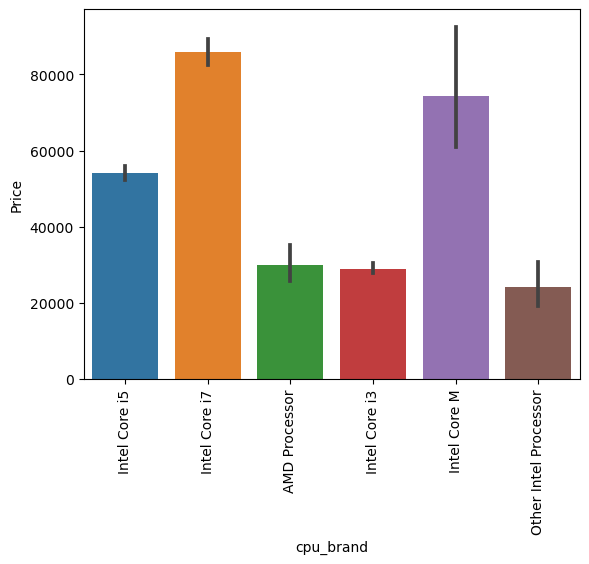

In [172]:
plt.xticks(rotation = 90)

sns.barplot(x=df['cpu_brand'],
            y=df['Price']
           )

plt.show()


#1. laptops with intel i7 and intel M have very high price

#### 4.11 df['Ram'] column analysis

<Axes: >

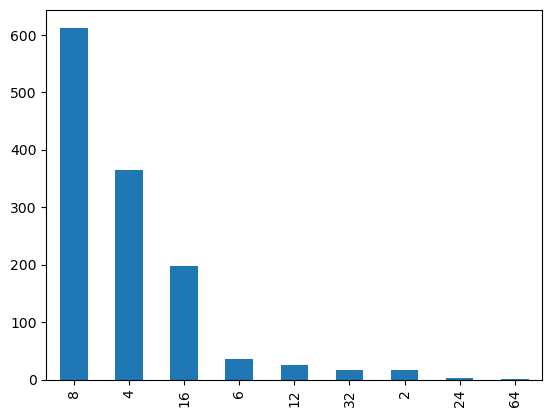

In [173]:
df['Ram'].value_counts().plot(kind='bar')

#1. so 8gb ram is standard size in the laptops

<Axes: xlabel='Ram', ylabel='Price'>

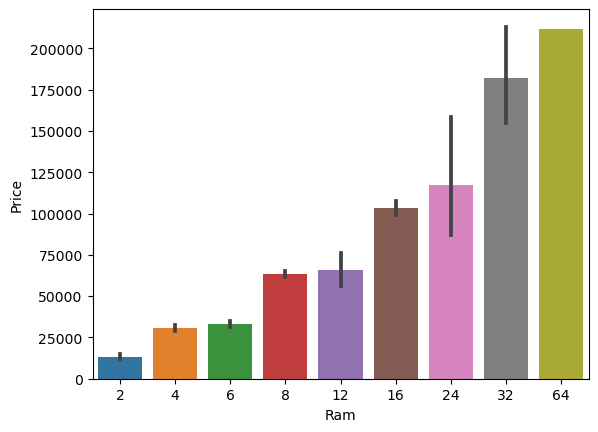

In [174]:
sns.barplot(x=df['Ram'],
            y=df['Price']
           )

#1. As the ram size increases, price also increases.
#2. not much diff. in price for 8gb and 12gb bcoz some brands sold 12gb laptop on the price equivalent to 8gb ram laptop, so 
#   that they can compete with their competators.

#### 4.12 correlation analysis for memory related columns

In [175]:
df.corr()['Price']

#1. ssd has high corr with price
#2. hdd has negative corr with price
#3. hybrid and flash_storage have very low corr. with price and i can think of removing these columns

Ram              0.739996
Weight           0.211667
Price            1.000000
Touchscreen      0.190382
Ips              0.251514
ppi              0.471481
HDD             -0.098481
SSD              0.669808
Hybrid           0.022490
Flash_Storage   -0.036712
Name: Price, dtype: float64

In [176]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'cpu_brand', 'HDD', 'SSD', 'gpu_brand', 'os'],
      dtype='object')

#### 4.13 df['gpu_brand'] column analysis

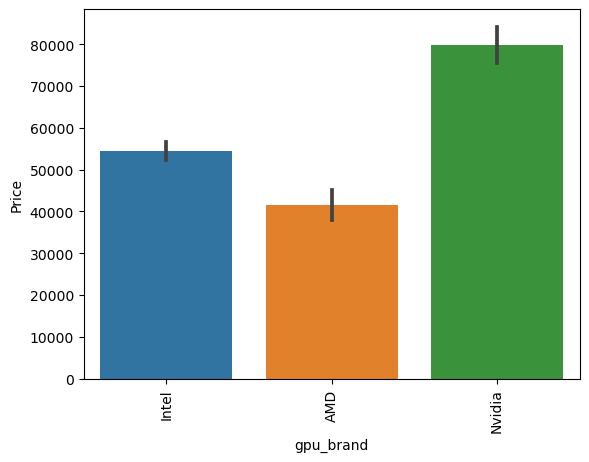

In [177]:
sns.barplot(x=df['gpu_brand'],
            y=df['Price']
            )

plt.xticks(rotation = 90)
plt.show()

#1. clearly nvidia is expensive
#2. AMD is less expensive than intel ? may be intel just intoduced some graphics card more expensive, that is why intel price
#   goes up than AMD.
#   let's try to compare median values

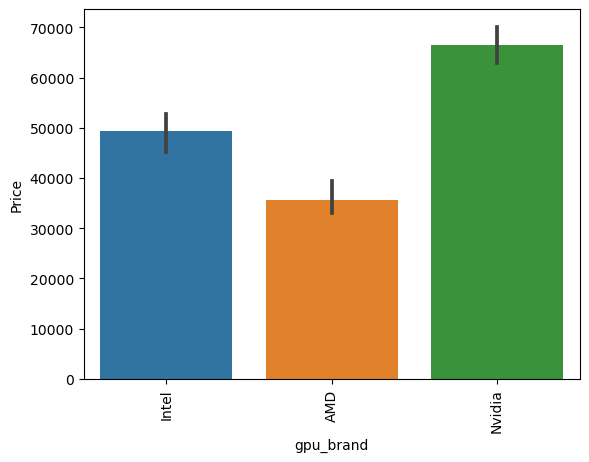

In [178]:
sns.barplot(x=df['gpu_brand'],
            y=df['Price'],
            estimator = np.median
            )

plt.xticks(rotation = 90)
plt.show()

#1. i can see that, really intel is expensive than AMD

#### 4.14 df['os'] column analysis

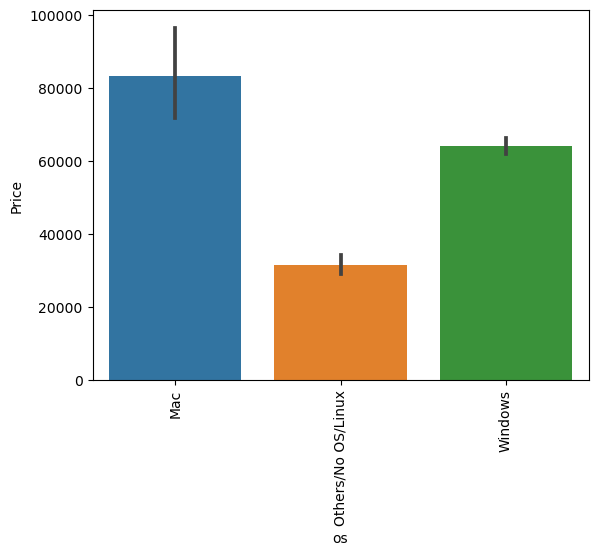

In [179]:
sns.barplot(x=df['os'],
            y=df['Price'])

plt.xticks(rotation=90)
plt.show()

#1. price of mac is higher than windows.

#### 4.15 df['Weight'] column analysis

<Axes: xlabel='Weight', ylabel='Density'>

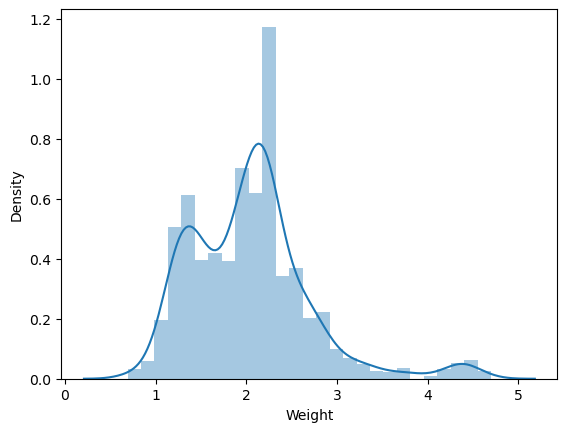

In [180]:
sns.distplot(df['Weight'])

#1. this is fair and it is bimodal

<Axes: xlabel='Weight', ylabel='Price'>

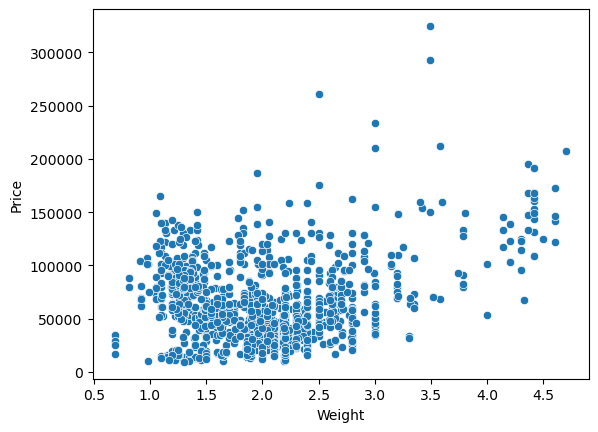

In [181]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

#1. as weight increses, price slightly increases

In [182]:
df.corr()['Price']

#1. weight has very less corr with price

Ram            0.739996
Weight         0.211667
Price          1.000000
Touchscreen    0.190382
Ips            0.251514
ppi            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

#### 4.16 metric analysis 

In [183]:
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.389134,0.739996,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.211667,-0.292288,0.023966,-0.319499,0.510876,-0.056984
Price,0.739996,0.211667,1.000000,0.190382,0.251514,0.471481,-0.098481,0.669808
Touchscreen,0.113316,-0.292288,0.190382,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.251514,0.136973,1.000000,0.288833,-0.090411,0.215197
ppi,0.294927,-0.319499,0.471481,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.098481,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056984,0.669808,0.252142,0.215197,0.499899,-0.400625,1.000000


<Axes: >

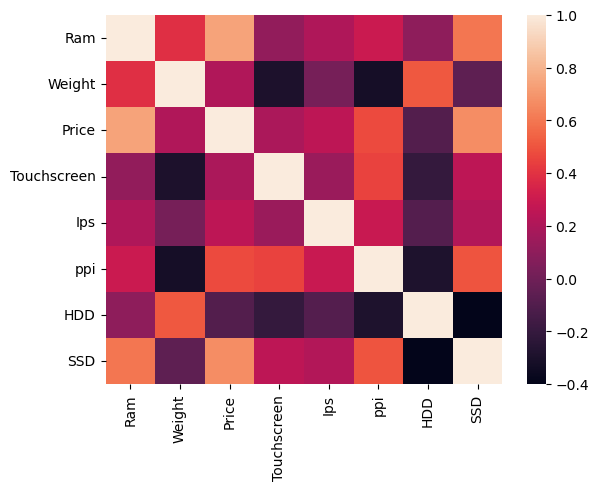

In [184]:
sns.heatmap(df.corr())

### 6. handling target colummn

In [185]:
#1. our target column is skewed and it can create problem for our ml algorithm
#2. we try to use log transformation on our target variable

<Axes: xlabel='Price', ylabel='Density'>

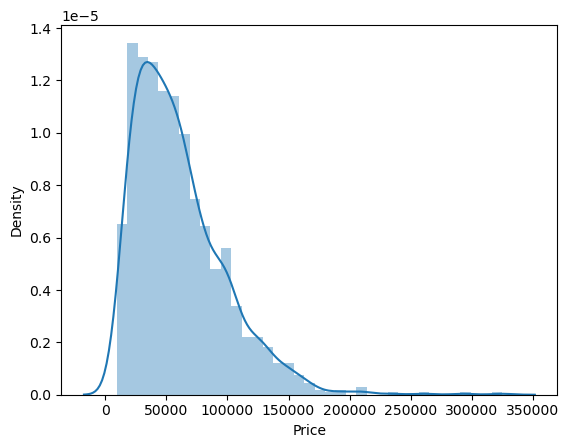

In [186]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

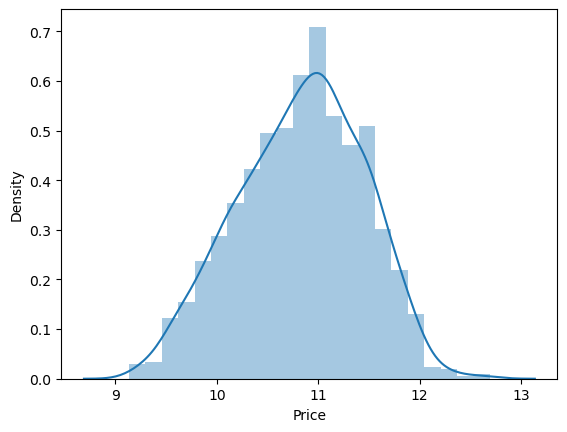

In [187]:
#dist. plot with log transformation

sns.distplot(np.log(df['Price']))

In [188]:
#note : 1) while extracting y, we will apply log transformation
#       2) while predicting, we wil apply reverse of log i.e. exponent

### 7. model building

In [189]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [190]:
x.sample(2)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
391,Asus,Gaming,16,3.00,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
768,Samsung,Ultrabook,8,1.31,1,0,165.632118,Intel Core i7,0,256,Intel,Windows


In [191]:
y.sample(2)

90     10.525212
222    11.193004
Name: Price, dtype: float64

#### 7.1 train_test_split

In [192]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=5)
x_train.head(2)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
654,HP,Notebook,4,1.86,0,0,100.454670,Intel Core i3,500,0,Intel,Others/No OS/Linux
747,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i3,0,256,Intel,Windows


#### 7.2 transformation (OneHotEncoding)

In [193]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [194]:
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [195]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [196]:
x_train.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
654,HP,Notebook,4,1.86,0,0,100.45467,Intel Core i3,500,0,Intel,Others/No OS/Linux


#### 7.3 pipeline

In [197]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')

#('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
#col_tnf --- name which i call for my transformer
#OneHotEncoder --- my transformer
#sparse=False --- it will print array otherwise it will give sparse matrix
#drop='first' --- it will drop the Company column and take all the encoded columns if i am using encoder on company column
#[0,1,7,10,11] --- column index on which i want to perform column transformation (OneHotEncoder); 
#use indexing according to x_train not df
#
#remainder='passthrough' --- shift + tab (3-4 times) ......  read it

step2 = LinearRegression()

pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.852336115022941
MAE score 0.18392961063027302


#### 7.5 trying models

##### a) LinearRegression

In [198]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = LinearRegression()


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.852336115022941
MAE score 0.18392961063027302


##### b) Ridge Regression

In [199]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = Ridge(alpha=10)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.8490651098252073
MAE score 0.18922416623380942


##### c) Lasso Regression

In [200]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = Lasso(alpha=0.001)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.8492271317371896
MAE score 0.187128853501973


##### d) KNN

In [201]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = KNeighborsRegressor(n_neighbors=5)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.7508720546799591
MAE score 0.22220090809704898


##### e) Decision Tree

In [202]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = DecisionTreeRegressor(max_depth=8)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.8248959218347925
MAE score 0.1872303691671598


##### f) SVR

In [217]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = SVR(kernel='rbf',C=100,epsilon=0.1)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.7063300711531851
MAE score 0.2630677764095157


##### g) Randon Forest

In [205]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                             )


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.894193539298513
MAE score 0.14960057250546077


##### h)ExtraTrees

In [208]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True
                             )


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.8770789222641825
MAE score 0.15353431157009495


##### i) AdaBoost

In [209]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.8223281313738691
MAE score 0.2115800022725793


##### j) GradientBoost

In [211]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = GradientBoostingRegressor(n_estimators=500)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.9071642870745016
MAE score 0.14228265007208676


##### k) XGBoost

In [219]:
step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = XGBRegressor(n_estimators=45,max_depth=5, learning_rate=0.5)


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.9072049542230903
MAE score 0.14575447574713424


### 8. website creation

In [221]:
#1. we are going with our best model
#2. here i  go with random forest

#3. so, i need to import obj of random forest i.e. pipe (just go and re run the random forest code)
#4. i also need to import dataframe

In [220]:
#randomforest

step1 = ColumnTransformer(
                 transformers=[
                               ('col_tnf',OneHotEncoder(sparse = False,drop='first'),[0,1,7,10,11])
                             ], remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                             )


pipe = Pipeline([('step1',step1),
                 ('step2',step2)
               ])


pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE score',mean_absolute_error(y_test,y_pred))

R2 score 0.894193539298513
MAE score 0.14960057250546077


In [224]:
#dataframe

df.head(2)

#if i am exporting this, then i have to make dropdown menu for website according to this dataframe

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,HDD,SSD,gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


#### 8.1 exporting the model

In [225]:
import pickle

pickle.dump(df, open('df.pkl','wb'))          #wb = write binary
pickle.dump(pipe, open('pipe.pkl','wb'))      #pipe = model_name

In [226]:
#in our destination folder we can see two file :
#df.pkl
#pipe.pkl

#now open vscode